In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
data21 = pd.read_csv('IT-NO_2021_hourly.csv')
data22 = pd.read_csv('IT-NO_2022_hourly.csv')
data23 = pd.read_csv('IT-NO_2023_hourly.csv')
concatenated_df = pd.concat([data21, data22, data23], ignore_index=True)

df=concatenated_df.dropna(axis=1,how="all")

df['Datetime (UTC)'] = pd.to_datetime(df['Datetime (UTC)'])

df['Datetime (UTC)'] = df['Datetime (UTC)'].dt.strftime('%Y%m%d%H')

df['Datetime (UTC)'] = df['Datetime (UTC)'].str.replace('-', '').str.replace(':', '')
df.head()


,Datetime (UTC),Country,Zone Name,Zone Id,Carbon Intensity gCO₂eq/kWh (direct),Carbon Intensity gCO₂eq/kWh (LCA),Low Carbon Percentage,Renewable Percentage,Data Source,Data Estimated,Data Estimation Method
0,2021010100,Italy,North Italy,IT-NO,303.29,389.74,35.12,30.82,entsoe.eu,False,NaN
1,2021010101,Italy,North Italy,IT-NO,303.45,387.76,36.15,33.12,entsoe.eu,False,NaN
2,2021010102,Italy,North Italy,IT-NO,295.04,377.86,37.89,33.65,entsoe.eu,False,NaN
3,2021010103,Italy,North Italy,IT-NO,295.56,380.36,37.14,32.05,entsoe.eu,False,NaN
4,2021010104,Italy,North Italy,IT-NO,308.06,394.66,34.50,31.71,entsoe.eu,False,NaN


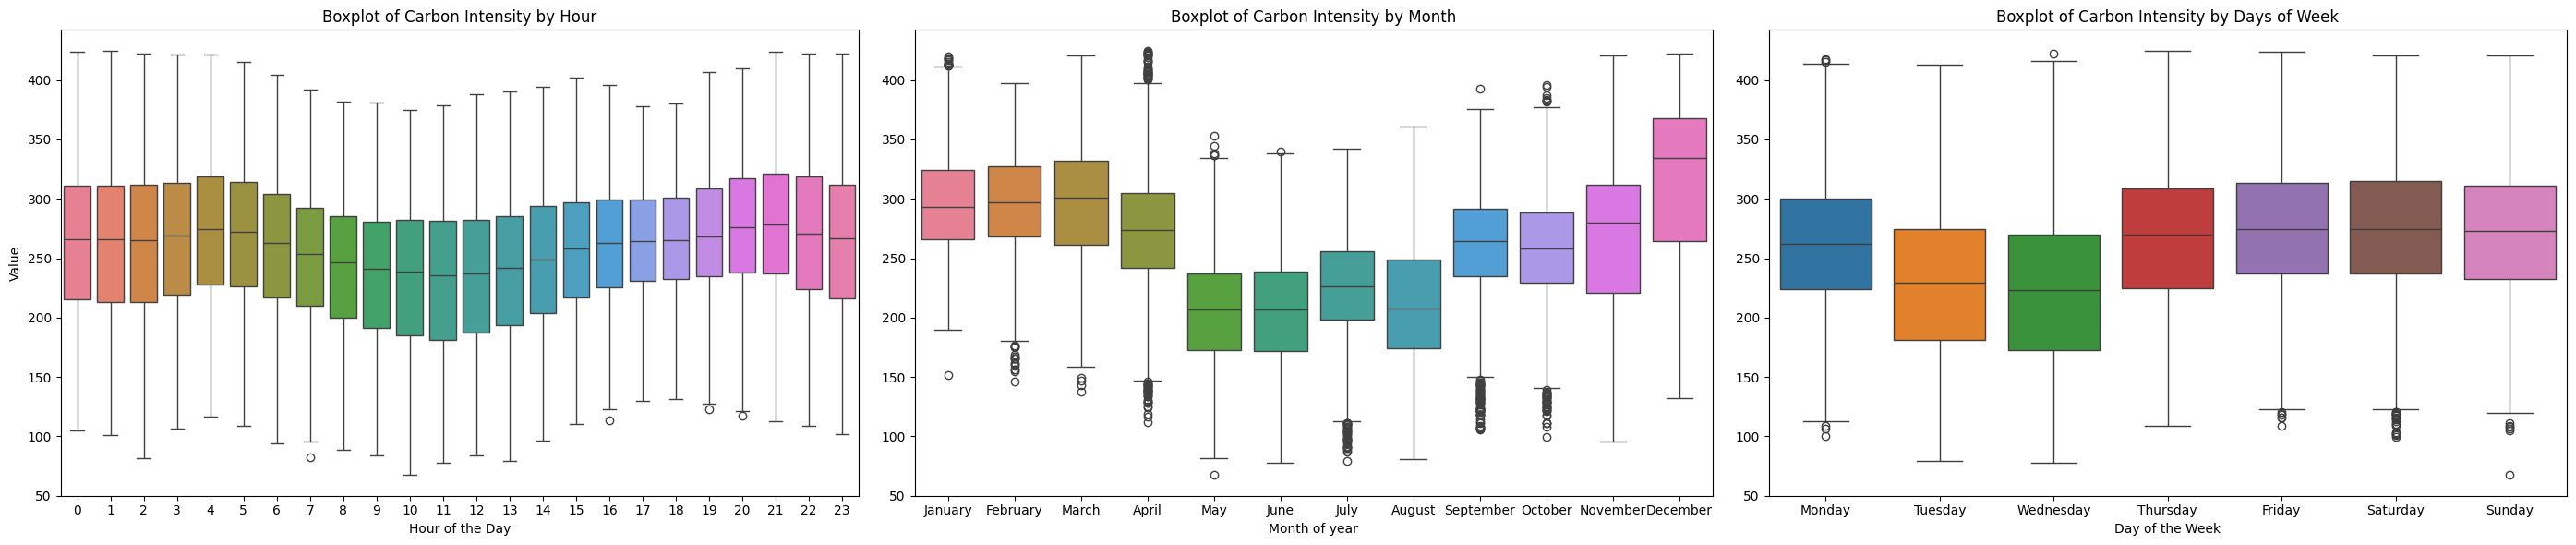

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation
uni_df = df['Carbon Intensity gCO₂eq/kWh (direct)']

# Plot 1: Boxplot of Carbon Intensity by Hour
hourly_data = uni_df.values.reshape(-1, 24)
hourly_df_by_hour = pd.DataFrame(hourly_data, columns=np.arange(24))

# Plot 2: Boxplot of Carbon Intensity by Month
reshaped_data_month = uni_df[:25920].values.reshape(-1, 720)
res12 = []
for i in range(12):
    column = []
    for j in range(i, 36, 12):
        column.extend(reshaped_data_month[j])
    res12.append(column)
res12 = np.array(res12).T
hourly_df_by_month = pd.DataFrame(res12, columns=['January', 'February', 'March', 'April', 'May', 'June',
                                                  'July', 'August', 'September', 'October', 'November', 'December'])

# Plot 3: Boxplot of Carbon Intensity by Days of Week
reshaped_data_day = uni_df.values.reshape(-1, 24)
res_day = []
for i in range(7):
    column = []
    for j in range(i, 1092, 7):
        column = np.append(column, reshaped_data_day[j])
    res_day.append(column)
res_day = np.array(res_day).T
hourly_df_by_day = pd.DataFrame(res_day, columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Create a figure with 3 subplots arranged horizontally
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(28, 6))

# Plotting each boxplot in its respective subplot
sns.boxplot(data=hourly_df_by_hour, ax=axes[0])
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Value')
axes[0].set_title('Boxplot of Carbon Intensity by Hour')

sns.boxplot(data=hourly_df_by_month, ax=axes[1])
axes[1].set_xlabel('Month of year')
# axes[1].set_ylabel('Value')
axes[1].set_title('Boxplot of Carbon Intensity by Month')

sns.boxplot(data=hourly_df_by_day, ax=axes[2])
axes[2].set_xlabel('Day of the Week')
# axes[2].set_ylabel('Value')
axes[2].set_title('Boxplot of Carbon Intensity by Days of Week')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()


In [9]:
data_matrix = np.array(uni_df).reshape(-1, 1)

lable_size=6
window_size = 24 + lable_size
step_size = 1

combined_data = []

for i in range(0, len(data_matrix) - window_size + 1, step_size):

    window = data_matrix[i:i+window_size]

    combined_data.append(window.flatten())

tw_df = np.array(combined_data)

print("Shape of combined_data_matrix:", tw_df.shape)  # (26251, 30)

l=[]
for i in range(23, tw_df.shape[0]+23):
  l.append(df['Datetime (UTC)'][i])
tw_df=pd.DataFrame(tw_df)
tw_df['index']=l
tw_df.set_index('index', inplace=True)
tw_df.reset_index(inplace=True)
column_mapping = {'index ': '0'}
for i in range(30):
    column_mapping[i] = str(i + 1)
tw_df.rename(columns=column_mapping, inplace=True)
tw_df.rename(columns={'index': '0'}, inplace=True)
tw_df.head()

Shape of combined_data_matrix: (26251, 30)


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,2021010123,303.29,303.45,295.04,295.56,308.06,302.32,279.98,267.33,272.62,...,267.10,285.47,292.68,315.01,309.16,310.88,312.47,307.71,313.31,299.05
1,2021010200,303.45,295.04,295.56,308.06,302.32,279.98,267.33,272.62,280.13,...,285.47,292.68,315.01,309.16,310.88,312.47,307.71,313.31,299.05,273.42
2,2021010201,295.04,295.56,308.06,302.32,279.98,267.33,272.62,280.13,294.88,...,292.68,315.01,309.16,310.88,312.47,307.71,313.31,299.05,273.42,264.03
3,2021010202,295.56,308.06,302.32,279.98,267.33,272.62,280.13,294.88,287.16,...,315.01,309.16,310.88,312.47,307.71,313.31,299.05,273.42,264.03,257.06
4,2021010203,308.06,302.32,279.98,267.33,272.62,280.13,294.88,287.16,285.02,...,309.16,310.88,312.47,307.71,313.31,299.05,273.42,264.03,257.06,250.32


In [10]:
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader

features = tw_df.iloc[:, 1:25].values
labels = tw_df.iloc[:, 25:].values

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# features = scaler.fit_transform(features)
# labels_scaled = scaler.fit_transform(labels)


# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# features = scaler.fit_transform(features)
# labels_scaled = scaler.fit_transform(labels)

from sklearn.preprocessing import RobustScaler
scaler_feature = RobustScaler()
scaler_label = RobustScaler()

real=features
features = scaler_feature.fit_transform(features)
labels_scaled = scaler_label.fit_transform(labels)

# from sklearn.preprocessing import Normalizer
# scaler = Normalizer()
# features = scaler.fit_transform(features)
# labels_scaled = scaler.fit_transform(labels)


X_train, X_test, y_train, y_test = train_test_split(features, labels_scaled, test_size=0.2)

X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)
train_data = pd.concat([X_train_df, y_train_df], axis=1)
numpy_array = train_data.values

concatenated_array = np.concatenate((X_test, y_test), axis=1)
batch_size=126
import torch
from torch.utils.data import Dataset
random_state=42

class MyDataset(Dataset):
    def __init__(self, data, sequence_length):
        self.data = data
        self.sequence_length = sequence_length
    if random_state is not None:
        torch.manual_seed(random_state)
        torch.cuda.manual_seed_all(random_state)

    def __len__(self):
        return len(self.data) - self.sequence_length+ 1


    def __getitem__(self, idx):
        sequence = self.data[idx:idx + self.sequence_length]
        input_sequence = sequence[0][:24].reshape(1,24)
        output_sequence = sequence[0][24:].reshape(1,6)
        return input_sequence, output_sequence

sequence_length = 1

train_dataset = MyDataset(numpy_array,sequence_length)
test_dataset = MyDataset(concatenated_array,sequence_length)


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [11]:
input_size = X_train.shape[1]
learning_rate= 0.001
hidden_units= 64
dropout=0.0
num_epochs = 20
batch_size=128
num_layers=1
output_size=lable_size
import torch.nn.functional as F

class ModelTwo(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, bidirectional=True, dropout=0.2):
        super(ModelTwo, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.bidirectional = bidirectional
        self.dropout = dropout
        self.embedding = nn.Linear(input_size, hidden_size)
        self.lstm = nn.LSTM(hidden_size, hidden_size, num_layers=num_layers, bidirectional=bidirectional, batch_first=True)
        self.fc1 = nn.Linear(hidden_size * 2 if bidirectional else hidden_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.batch_norm1 = nn.BatchNorm1d(hidden_size)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_layers * (2 if self.bidirectional else 1), batch_size,self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers * (2 if self.bidirectional else 1), batch_size, self.hidden_size).to(x.device)
        x = self.embedding(x)
        # x = F.relu(x)
        x, _ = self.lstm(x, (h0, c0))
        x = self.fc1(x)
        # x = x.permute(0, 2, 1)
        # x = self.batch_norm1(x)
        # x = x.permute(0, 2, 1)
        # x = F.relu(x)
        x = self.fc2(x)
        return x


model_Two = ModelTwo(input_size, hidden_units,num_layers, output_size)

optimizer = torch.optim.Adam(model_Two.parameters(), lr=learning_rate)
# criterion = nn.MSELoss()
# criterion = nn.L1Loss()
criterion = nn.SmoothL1Loss()



In [7]:
!pip install torchviz


  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchviz import make_dot

input_size = 24  # Example input size (replace with X_train.shape[1])
hidden_units = 64
dropout = 0.2
num_layers = 1
output_size = 6  # Example output size (replace with label_size)

class ModelTwo(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, bidirectional=True, dropout=0.2):
        super(ModelTwo, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.bidirectional = bidirectional
        self.dropout = dropout
        self.embedding = nn.Linear(input_size, hidden_size)
        self.lstm = nn.LSTM(hidden_size, hidden_size, num_layers=num_layers, bidirectional=bidirectional, batch_first=True)
        self.fc1 = nn.Linear(hidden_size * 2 if bidirectional else hidden_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.batch_norm1 = nn.BatchNorm1d(hidden_size)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_layers * (2 if self.bidirectional else 1), batch_size, self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers * (2 if self.bidirectional else 1), batch_size, self.hidden_size).to(x.device)
        x = self.embedding(x)
        x, _ = self.lstm(x, (h0, c0))
        x = self.fc1(x)
        x = self.fc2(x)
        return x

# Instantiate the model
model = ModelTwo(input_size, hidden_units, num_layers, output_size)

# Create a sample input tensor
sample_input = torch.randn(1, 10, input_size)  # (batch_size, sequence_length, input_size)

# Generate the visualization graph
output = model(sample_input)
dot = make_dot(output, params=dict(model.named_parameters()))

# Display the graph
dot.render("network_architecture", format="png")


'network_architecture.png'

In [16]:
model_Two.train()
print('Training Model Two')
for epoch in range(num_epochs):
    total_loss = 0
    for batch_X, batch_y in train_loader:
        batch_X = batch_X.to(torch.float32)
        batch_y = batch_y.to(torch.float32)
        optimizer.zero_grad()
        outputs = model_Two(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train_loader):.4f}')


Training Model Two
Epoch [1/20], Loss: 0.0503
Epoch [2/20], Loss: 0.0253
Epoch [3/20], Loss: 0.0243
Epoch [4/20], Loss: 0.0241
Epoch [5/20], Loss: 0.0236
Epoch [6/20], Loss: 0.0234
Epoch [7/20], Loss: 0.0232
Epoch [8/20], Loss: 0.0233
Epoch [9/20], Loss: 0.0233
Epoch [10/20], Loss: 0.0229
Epoch [11/20], Loss: 0.0230
Epoch [12/20], Loss: 0.0227
Epoch [13/20], Loss: 0.0228
Epoch [14/20], Loss: 0.0227
Epoch [15/20], Loss: 0.0226
Epoch [16/20], Loss: 0.0227
Epoch [17/20], Loss: 0.0225
Epoch [18/20], Loss: 0.0223
Epoch [19/20], Loss: 0.0223
Epoch [20/20], Loss: 0.0220


In [17]:
model_Two.eval()
predictions_list = []
with torch.no_grad():
    total_mse = 0
    for batch_X, batch_y in test_loader:
        batch_X = batch_X.to(torch.float32)
        batch_y = batch_y.to(torch.float32)
        predictions = model_Two(batch_X).numpy()
        predictions_list.append(predictions)
        total_mse += np.mean((predictions - batch_y.numpy()) ** 2)
mse2 = total_mse / len(test_loader)
print(f'Mean Squared Error (MSE) of model_Two: {mse2:.4f}')

Mean Squared Error (MSE) of model_Two: 0.0453


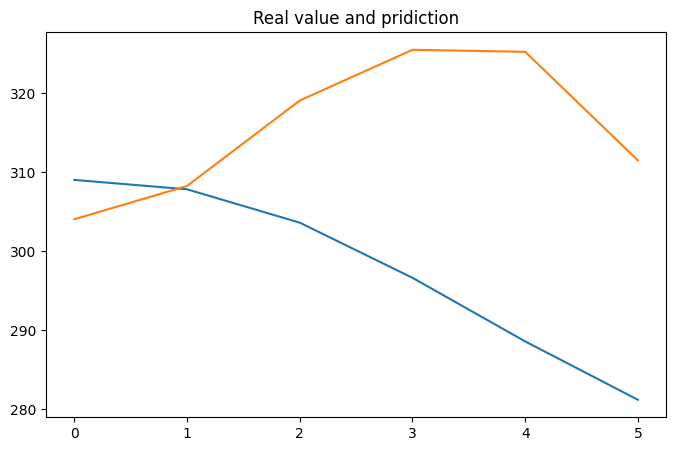

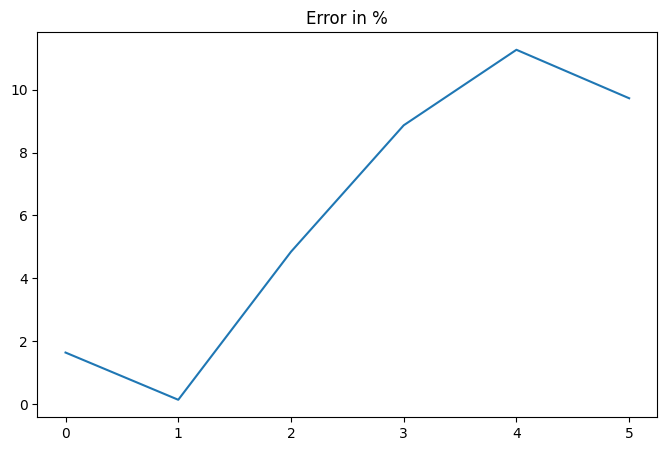

In [18]:
n=0
flat_predictions = [prediction for batch_predictions in predictions_list for prediction in batch_predictions]
flat_predictions = np.array(flat_predictions)
flat_predictions=flat_predictions.reshape(5251,6)
predictions_original6 = scaler_label.inverse_transform(flat_predictions)
array2_original = scaler_label.inverse_transform(y_test)


plt.figure(figsize=(8,5))
plt.title('Real value and pridiction')
plt.plot(predictions_original6[n])
plt.plot(array2_original[n])
plt.show()

plt.figure(figsize=(8, 5))
plt.title('Error in %')
plt.plot(np.abs(predictions_original6[n]-array2_original[n])*100/np.abs(array2_original[n]))
plt.show()

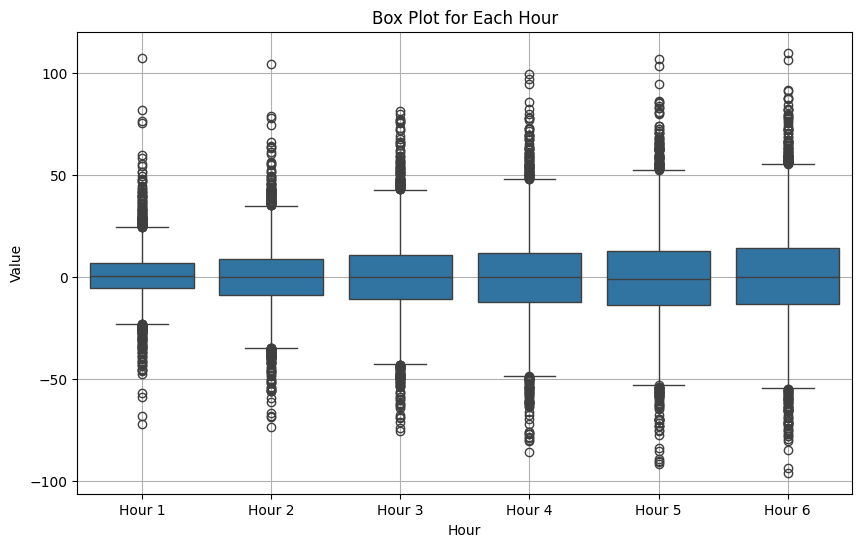

In [25]:


# Create a random matrix (replace this with your actual data)
data = predictions_original6 - array2_original

# Assuming data is a 2D array with shape (n_samples, 6)
n_samples, n_hours = data.shape

# Create a DataFrame suitable for Seaborn
df = pd.DataFrame(data, columns=[f'Hour {i+1}' for i in range(n_hours)])

# Melt the DataFrame to long-form for Seaborn
df_melted = df.melt(var_name='Hour', value_name='Value')

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Hour', y='Value', data=df_melted)

plt.title('Box Plot for Each Hour')
plt.grid(True)
plt.show()


In [ ]:
data_matrix = np.array(uni_df).reshape(-1, 1)

lable_size=720
window_size = 720 + lable_size
step_size = 1

combined_data = []

for i in range(0, len(data_matrix) - window_size + 1, step_size):

    window = data_matrix[i:i+window_size]

    combined_data.append(window.flatten())

tw_df = np.array(combined_data)

print("Shape of combined_data_matrix:", tw_df.shape)

l=[]
for i in range(23, tw_df.shape[0]+23):
  l.append(df['Datetime (UTC)'][i])
tw_df=pd.DataFrame(tw_df)
tw_df['index']=l
tw_df.set_index('index', inplace=True)
tw_df.reset_index(inplace=True)
column_mapping = {'index ': '0'}
for i in range(30):
    column_mapping[i] = str(i + 1)
tw_df.rename(columns=column_mapping, inplace=True)
tw_df.rename(columns={'index': '0'}, inplace=True)
tw_df.head()

Shape of combined_data_matrix: (24841, 1440)


,0,1,2,3,4,5,6,7,8,9,...,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439
0,2021010123,303.29,303.45,295.04,295.56,308.06,302.32,279.98,267.33,272.62,...,253.49,262.33,267.67,274.37,272.69,268.65,287.64,283.46,287.27,282.46
1,2021010200,303.45,295.04,295.56,308.06,302.32,279.98,267.33,272.62,280.13,...,262.33,267.67,274.37,272.69,268.65,287.64,283.46,287.27,282.46,279.05
2,2021010201,295.04,295.56,308.06,302.32,279.98,267.33,272.62,280.13,294.88,...,267.67,274.37,272.69,268.65,287.64,283.46,287.27,282.46,279.05,286.65
3,2021010202,295.56,308.06,302.32,279.98,267.33,272.62,280.13,294.88,287.16,...,274.37,272.69,268.65,287.64,283.46,287.27,282.46,279.05,286.65,300.36
4,2021010203,308.06,302.32,279.98,267.33,272.62,280.13,294.88,287.16,285.02,...,272.69,268.65,287.64,283.46,287.27,282.46,279.05,286.65,300.36,308.24


In [ ]:
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader

features = tw_df.iloc[:, 1:721].values
labels = tw_df.iloc[:, 721:].values


from sklearn.preprocessing import RobustScaler
scaler_feature = RobustScaler()
scaler_label = RobustScaler()

real=features
features = scaler_feature.fit_transform(features)
labels_scaled = scaler_label.fit_transform(labels)


train_start_date = 0
train_end_date = 16560
test_start_date = 16561

X_train = features[train_start_date:train_end_date]
X_test = features[test_start_date:]
y_train= labels_scaled[train_start_date:train_end_date]
y_test = labels_scaled[test_start_date:]
# X_train, X_test, y_train, y_test = train_test_split(features, labels_scaled, test_size=0.2)

X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)
train_data = pd.concat([X_train_df, y_train_df], axis=1)
numpy_array = train_data.values

concatenated_array = np.concatenate((X_test, y_test), axis=1)
batch_size=126
import torch
from torch.utils.data import Dataset
random_state=42

class MyDataset(Dataset):
    def __init__(self, data, sequence_length):
        self.data = data
        self.sequence_length = sequence_length
    if random_state is not None:
        torch.manual_seed(random_state)
        torch.cuda.manual_seed_all(random_state)

    def __len__(self):
        return len(self.data) - self.sequence_length+ 1


    def __getitem__(self, idx):
        sequence = self.data[idx:idx + self.sequence_length]
        input_sequence = sequence[0][:720].reshape(1,720)
        output_sequence = sequence[0][720:].reshape(1,720)
        return input_sequence, output_sequence

sequence_length = 1

train_dataset = MyDataset(numpy_array,sequence_length)
test_dataset = MyDataset(concatenated_array,sequence_length)


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
input_size = X_train.shape[1]
learning_rate= 0.001
hidden_units= 1024
dropout=0.0
num_epochs = 20
batch_size=128
num_layers=1
output_size=lable_size
class ModelTwo(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, bidirectional=True, dropout=0.2):
        super(ModelTwo, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.bidirectional = bidirectional
        self.dropout = dropout
        self.embedding = nn.Linear(input_size, hidden_size)
        self.lstm = nn.LSTM(hidden_size, hidden_size, num_layers=num_layers, bidirectional=bidirectional, batch_first=True)
        self.fc1 = nn.Linear(hidden_size * 2 if bidirectional else hidden_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.batch_norm1 = nn.BatchNorm1d(hidden_size)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_layers * (2 if self.bidirectional else 1), batch_size,self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers * (2 if self.bidirectional else 1), batch_size, self.hidden_size).to(x.device)
        x = self.embedding(x)
        # x = F.relu(x)
        x, _ = self.lstm(x, (h0, c0))
        x = self.fc1(x)
        # x = x.permute(0, 2, 1)
        # x = self.batch_norm1(x)
        # x = x.permute(0, 2, 1)
        # x = F.relu(x)
        x = self.fc2(x)
        return x


model_Two = ModelTwo(input_size, hidden_units,num_layers, output_size)

optimizer = torch.optim.Adam(model_Two.parameters(), lr=learning_rate)
# criterion = nn.MSELoss()
# criterion = nn.L1Loss()
criterion = nn.SmoothL1Loss()


In [ ]:
model_Two.train()
print('Training Model Two')
for epoch in range(num_epochs):
    total_loss = 0
    for batch_X, batch_y in train_loader:
        batch_X = batch_X.to(torch.float32)
        batch_y = batch_y.to(torch.float32)
        optimizer.zero_grad()
        outputs = model_Two(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train_loader):.4f}')


Training Model Two
Epoch [1/20], Loss: 0.0948
Epoch [2/20], Loss: 0.0349
Epoch [3/20], Loss: 0.0194
Epoch [4/20], Loss: 0.0151
Epoch [5/20], Loss: 0.0132
Epoch [6/20], Loss: 0.0124
Epoch [7/20], Loss: 0.0114
Epoch [8/20], Loss: 0.0101
Epoch [9/20], Loss: 0.0097
Epoch [10/20], Loss: 0.0096
Epoch [11/20], Loss: 0.0090
Epoch [12/20], Loss: 0.0085
Epoch [13/20], Loss: 0.0087
Epoch [14/20], Loss: 0.0099
Epoch [15/20], Loss: 0.0080
Epoch [16/20], Loss: 0.0069
Epoch [17/20], Loss: 0.0070
Epoch [18/20], Loss: 0.0069
Epoch [19/20], Loss: 0.0069
Epoch [20/20], Loss: 0.0069


In [ ]:
model_Two.eval()
predictions_list = []
with torch.no_grad():
    total_mse = 0
    for batch_X, batch_y in test_loader:
        batch_X = batch_X.to(torch.float32)
        batch_y = batch_y.to(torch.float32)
        predictions = model_Two(batch_X).numpy()
        predictions_list.append(predictions)
        total_mse += np.mean((predictions - batch_y.numpy()) ** 2)
mse2 = total_mse / len(test_loader)
print(f'Mean Squared Error (MSE) of model_Two: {mse2:.4f}')

Mean Squared Error (MSE) of model_Two: 0.2614


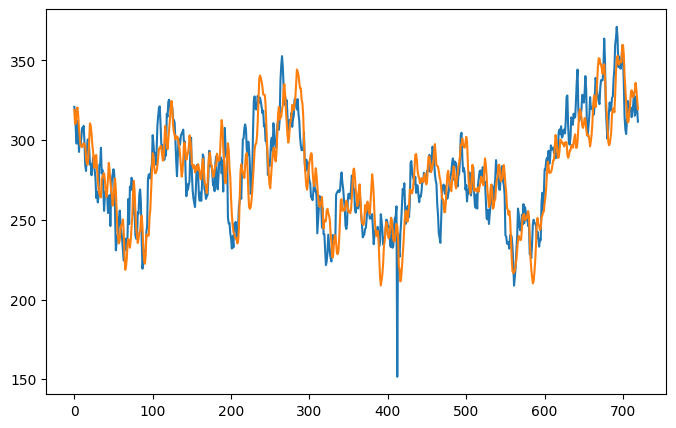

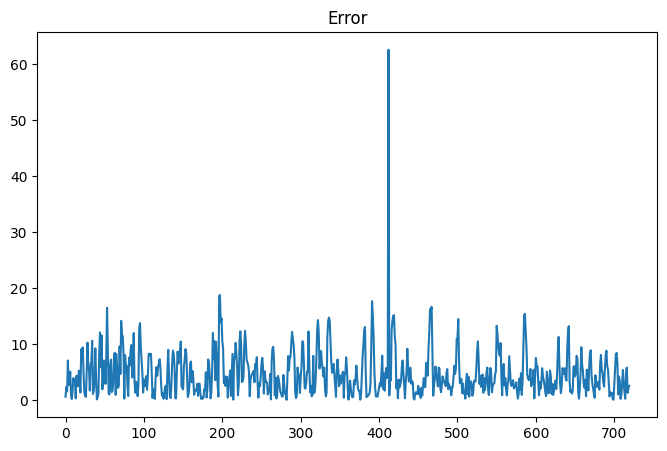

In [ ]:
n=0
flat_predictions = [prediction for batch_predictions in predictions_list for prediction in batch_predictions]
flat_predictions = np.array(flat_predictions)
flat_predictions=flat_predictions.reshape(8280,720)
x=np.concatenate((concatenated_array[n,1:721],flat_predictions[n]), axis=0)

predictions_original = scaler_label.inverse_transform(flat_predictions)
real_original = scaler_label.inverse_transform(y_test)

# x=np.concatenate((concatenated_array[n,1:721],flat_predictions[n]), axis=0)
plt.figure(figsize=(8, 5))
plt.plot(real_original[n])
plt.plot(predictions_original[n])
plt.show()



plt.figure(figsize=(8,5))
plt.title('Error')
plt.plot(np.abs(predictions_original[n]-real_original[n])*100/np.abs(real_original[n]))
plt.show()